#Task 1

[Google Colab Link](https://colab.research.google.com/drive/15grTRgANI2Md5cjZ4zaPH_zyje6xlni2?usp=sharing)

Dataset used:

[**Drug Review Dataset (Druglib.com) Data Set**](https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Druglib.com%29)

Provided by Surya Kallumadi and Felix Gräßer

Given the following parameters:


1. urlDrugName (categorical): name of drug
2. condition (categorical): name of condition
3. benefitsReview (text): patient on benefits
4. sideEffectsReview (text): patient on side effects
5. commentsReview (text): overall patient comment
6. rating (numerical): 10 star patient rating
7. sideEffects (categorical): 5 step side effect rating
8. effectiveness (categorical): 5 step effectiveness rating

We want to determine how any properties we can quantify such as sideEffects and Effectiveness will affect whether a patient feels overall positively (6-10) or negatively (1-5)  about a drug given to them. This is important becuase we want patients to have confidence that the drugs given to them work. As a hypothetical example, patients wouldn't likely want a drug with lots of sideeffects and little effectiveness.

The problem is a good logistic regression problem because we can abstract the rating scale out to make it a more general binary classification of whether patients consider a drug "effective"
or "not effective". We can then take other factors such
as sideEffect and effectiveness evaluation and then determine
if it is possible to predict perceived effectiveness or non-effectiveness based on trends in the individual factor ratings.

#Task 2

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import time
import math
import warnings
warnings.filterwarnings("ignore")

## Original File(s) statistics

4143 entries total

Original Training file "a1": 1407 

Original Training file "a2": 1700 

Original Test file "b": 1036

The training file had to be split into two due to parsing issues.

In [ ]:
df1a = pd.read_table('drugLibTrain_raw_p1.tsv') #, skiprows=1406
df1b = pd.read_table('drugLibTrain_raw_p2.tsv', 
                     header=None,
                     names=["Unnamed: 0",
                            "urlDrugName",
                            "rating",
                            "effectiveness",
                            "sideEffects",
                            "condition",
                            "benefitsReview",
                            "sideEffectsReview",
                            "commentsReview"])
df2 = pd.read_table('drugLibTest_raw.tsv')
print(df1a.shape)
print(df1b.shape)
print(df2.shape)

(1407, 9)
(1700, 9)
(1036, 9)


In [ ]:
df2

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...
...,...,...,...,...,...,...,...,...,...
1031,690,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1032,1071,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
1033,681,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
1034,2709,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [ ]:
#combine data for sanitizing
allframes = [df1a, df1b, df2]

dfall = pd.concat(allframes, ignore_index=True) #prevent duplicate indexed values

print(dfall.shape)

(4143, 9)


In [ ]:
dfall

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
4138,690,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
4139,1071,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
4140,681,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
4141,2709,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [ ]:
#check to make sure multliple values aren't on same row id
dfall.loc[0,:]

Unnamed: 0                                                        2202
urlDrugName                                                  enalapril
rating                                                               4
effectiveness                                         Highly Effective
sideEffects                                          Mild Side Effects
condition                       management of congestive heart failure
benefitsReview       slowed the progression of left ventricular dys...
sideEffectsReview    cough, hypotension , proteinuria, impotence , ...
commentsReview       monitor blood pressure , weight and asses for ...
Name: 0, dtype: object

In [ ]:
#identify # of empty fields
dfall.isna().sum()

Unnamed: 0           0
urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64

##Initial Dataset Impressions

This is a very clean dataset overall. A quick manual review
showed that rating, effectiveness, and sideEffects 
all had populated valid values in their intended ranges.
We will not be using condition - this will be explained below.

benefitsReview, sideEffectsReview, commentsReview
all consisted of valid strings or an empty field,
likely reflecting that the patient had no additional
comment on the drug used. We will just note for now that they are all in string format.


In [ ]:
print(dfall.urlDrugName.value_counts())

lexapro            74
paxil              58
retin-a            55
synthroid          53
zoloft             52
                   ..
elmiron             1
lasix               1
zovirax-topical     1
bactrim-ds          1
prevalite           1
Name: urlDrugName, Length: 541, dtype: int64


In [ ]:
print(dfall.condition.value_counts())

depression                                            302
acne                                                  211
anxiety                                                90
insomnia                                               75
birth control                                          68
                                                     ... 
ankylosing spondalytis                                  1
opiate/heroin addiction                                 1
improvement of skin appearance, very very mild acn      1
anxiety/worry                                           1
acne scarring & hyperpigmentation                       1
Name: condition, Length: 1807, dtype: int64


##Prelimary Review of the Data

We are not particularly concerned with the first column (ID numbers)
as it will not demonstrate any trends.

There are a 541 different drug names (column 2) and 
1807 condition names (column 5) with neither having an
entry or entries that takes up a noticeable majority
of the cases. (I.e. would result in a lot of features
as it would be hard to break down or group drugs or conditions
without extensive medical knowledge.)

We are primarily interested in whether reviewing tendencies 
correlate to confidence in overall drug rating, so we drop these columns for the time being for the sake of keeping features manageable.


The rating column is numerical, but the effectiveness and sideEffects columns have their values  as strings and must be converted to ints.

We use the following conversion scale:

**"Effectiveness Strength"**

Highly Effective = 5

Considerably Effective = 4

Moderately Effective = 3 

Marginally Effective = 2

Ineffective = 1

**"Side Effectiveness Strength"**

Extremely Severe Side Effects = 5

Severe Side Effects = 4 

Moderate Side Effects = 3

Mild Side Effects = 2

No Side Effects = 1


We can  quantify the comment fields (benefitsReview
,sideEffectsReview,commentsReview) by character length, to
see if there is any correlation between how talkative a user is in their
review and the overall effectiveness. (E.g. Do people who
talk more have more complaints and thus less overall rating/confidence in a drug?) 

It is worth noting a few users left some of their comment sections completely empty. A larger but still small portion of others left comments like "See Above" or "None" to demontrate that no details were mentions. Generally, though, this would only occur on 1 or rarely 2 of the 3 comment sections of a review, so we will assess them all as separate columns to see if is indicative of a user being more positive or negative about a drug.

In [ ]:
#Print the number of "None" style 
#comments for benefits, sideeffects, and comments respectively.
#About 1 out of 20 sideEffects reviewers had a None style comment.
#The other "None" style comments or empty comments are negligible amounts.

print(
dfall.loc[dfall['benefitsReview'].isin(['none','None','NONE','None.',
                                           'See above','See Above','see above',
                                           'See above.'])].shape
)
print(
dfall.loc[dfall['sideEffectsReview'].isin(['none','None','NONE','None.',
                                           'See above','See Above','see above',
                                           'See above.'])].shape
)
print(
dfall.loc[dfall['commentsReview'].isin(['none','None','NONE','None.',
                                           'See above','See Above','see above',
                                           'See above.'])].shape
)


(56, 9)
(276, 9)
(25, 9)


##Processing Data Based on Review



In [ ]:
#Drop the unused columns based on our preliminary review.
dfall_pruned=dfall.drop(['Unnamed: 0', 'urlDrugName','condition'], axis=1)
dfall_pruned

,rating,effectiveness,sideEffects,benefitsReview,sideEffectsReview,commentsReview
0,4,Highly Effective,Mild Side Effects,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,1,Highly Effective,Severe Side Effects,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,10,Highly Effective,No Side Effects,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3,Marginally Effective,Mild Side Effects,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,2,Marginally Effective,Severe Side Effects,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...
4138,7,Considerably Effective,Severe Side Effects,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
4139,10,Highly Effective,No Side Effects,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
4140,8,Considerably Effective,Moderate Side Effects,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
4141,10,Highly Effective,No Side Effects,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [ ]:
#convert effectiveness and sideEffect

effectDict = {
  "Highly Effective": 5,
  "Considerably Effective": 4,
  "Moderately Effective": 3,
  "Marginally Effective": 2,
  "Ineffective": 1
}

sideeffectDict = {
  "Extremely Severe Side Effects": 5,
  "Severe Side Effects": 4,
  "Moderate Side Effects": 3,
  "Mild Side Effects": 2,
  "No Side Effects": 1
}


dfall_pruned.loc[dfall_pruned['effectiveness'] == "Highly Effective", 'effectiveness'] = 5
dfall_pruned.loc[dfall_pruned['effectiveness'] == "Considerably Effective", 'effectiveness'] = 4
dfall_pruned.loc[dfall_pruned['effectiveness'] == "Moderately Effective", 'effectiveness'] = 3
dfall_pruned.loc[dfall_pruned['effectiveness'] == "Marginally Effective", 'effectiveness'] = 2
dfall_pruned.loc[dfall_pruned['effectiveness'] == "Ineffective", 'effectiveness'] = 1

dfall_pruned.loc[dfall_pruned['sideEffects'] == "Extremely Severe Side Effects", 'sideEffects'] = 5
dfall_pruned.loc[dfall_pruned['sideEffects'] == "Severe Side Effects", 'sideEffects'] = 4
dfall_pruned.loc[dfall_pruned['sideEffects'] == "Moderate Side Effects", 'sideEffects'] = 3
dfall_pruned.loc[dfall_pruned['sideEffects'] == "Mild Side Effects", 'sideEffects'] = 2
dfall_pruned.loc[dfall_pruned['sideEffects'] == "No Side Effects", 'sideEffects'] = 1
dfall_pruned

,rating,effectiveness,sideEffects,benefitsReview,sideEffectsReview,commentsReview
0,4,5,2,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,1,5,4,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,10,5,1,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3,2,2,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,2,2,4,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...
4138,7,4,4,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
4139,10,5,1,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
4140,8,4,3,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
4141,10,5,1,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [ ]:
#a few  comments have arbitrary float values - possibly corresponding to
#an additional rating, a misunderstood rating, 
#or some kind of survery-specific code?
#we'll try and cast these reports as strings 
#to preserve their presence in the data
dfall_pruned['benefitsReview'] = dfall_pruned['benefitsReview'].apply(lambda x: len(str(x)))
dfall_pruned['sideEffectsReview'] = dfall_pruned['sideEffectsReview'].apply(lambda x: len(str(x)))
dfall_pruned['commentsReview'] = dfall_pruned['commentsReview'].apply(lambda x: len(str(x)))
dfall_pruned

,rating,effectiveness,sideEffects,benefitsReview,sideEffectsReview,commentsReview
0,4,5,2,184,197,65
1,1,5,4,178,258,62
2,10,5,1,254,42,387
3,3,2,2,598,111,158
4,2,2,4,114,150,9
...,...,...,...,...,...,...
4138,7,4,4,230,371,218
4139,10,5,1,306,35,121
4140,8,4,3,31,47,262
4141,10,5,1,162,169,306


In [ ]:
#lastly make ratings negative/positive
dfall_pruned.loc[dfall_pruned['rating'] <= 5, 'rating'] = -1
dfall_pruned.loc[dfall_pruned['rating'] > 5, 'rating'] = 1
dfall_pruned

,rating,effectiveness,sideEffects,benefitsReview,sideEffectsReview,commentsReview
0,-1,5,2,184,197,65
1,-1,5,4,178,258,62
2,1,5,1,254,42,387
3,-1,2,2,598,111,158
4,-1,2,4,114,150,9
...,...,...,...,...,...,...
4138,1,4,4,230,371,218
4139,1,5,1,306,35,121
4140,1,4,3,31,47,262
4141,1,5,1,162,169,306


In [ ]:
#Imbalance in data: note that patients 
#typically tended to be positive
#about medical drug use in the data. 
dfall_pruned.rating.value_counts(normalize=True)

 1    0.727734
-1    0.272266
Name: rating, dtype: float64

## Graphs

We'll use some graphs to help get a better understanding of what our refined dataset looks like and if there are any trends we should look out for.

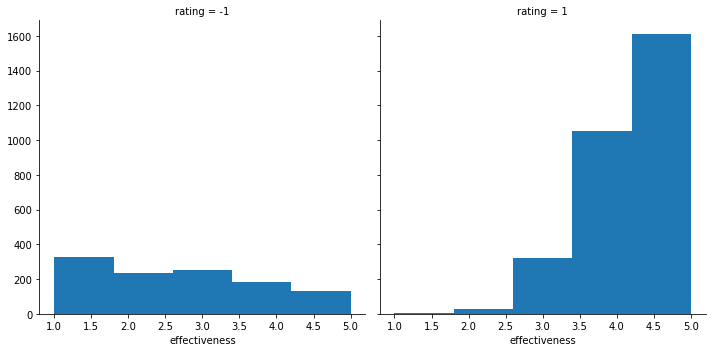

In [ ]:
g = sns.FacetGrid(dfall_pruned, col='rating', height=5)
g.map(plt.hist, 'effectiveness', bins=5)

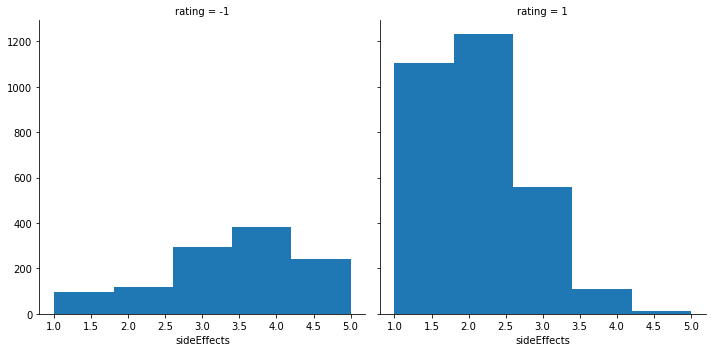

In [ ]:
g = sns.FacetGrid(dfall_pruned, col='rating', height=5)
g.map(plt.hist, 'sideEffects', bins=5)

### Observations on Brief Comments

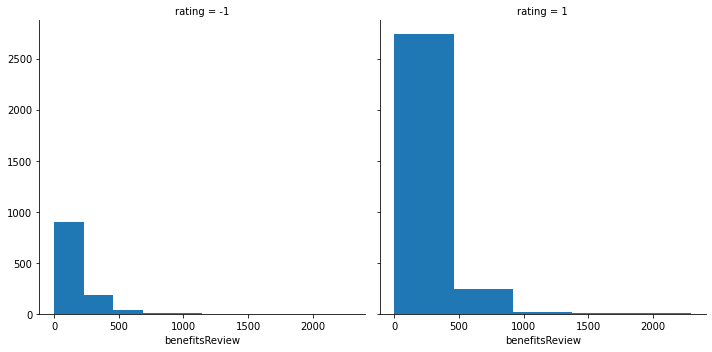

In [ ]:
#The histograms for comments sections highlight an interesting observation!
#Most people, regardless of their feelings about the drugs,
#tended to keep any comments in a given field under 500 words.
g = sns.FacetGrid(dfall_pruned, col='rating', height=5)
g.map(plt.hist, 'benefitsReview', bins=5)

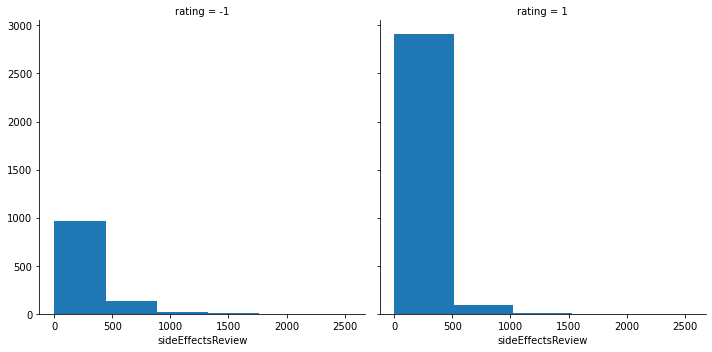

In [ ]:
g = sns.FacetGrid(dfall_pruned, col='rating', height=5)
g.map(plt.hist, 'sideEffectsReview', bins=5)

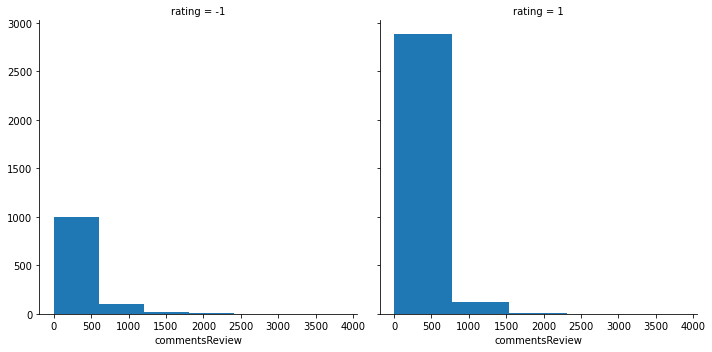

In [ ]:
g = sns.FacetGrid(dfall_pruned, col='rating', height=5)
g.map(plt.hist, 'commentsReview', bins=5)

In [ ]:
#majority of reviews in all categories 
#are in the 0-500 and 501-1000 ranges.
#An extremely large amount are 0-500.
print("benefitsReview: <=500, <=250, >500")
print(dfall_pruned['benefitsReview'][dfall_pruned['benefitsReview'] <= 500].count())
print(dfall_pruned['benefitsReview'][dfall_pruned['benefitsReview'] <= 250].count())
print(dfall_pruned['benefitsReview'][dfall_pruned['benefitsReview'] > 500].count())

print("sideEffectsReview: <=500, <=250, >500")
print(dfall_pruned['sideEffectsReview'][dfall_pruned['sideEffectsReview'] <= 500].count())
print(dfall_pruned['sideEffectsReview'][dfall_pruned['sideEffectsReview'] <= 250].count())
print(dfall_pruned['sideEffectsReview'][dfall_pruned['sideEffectsReview'] > 500].count())

print("sideEffectsReview: <=500, <=250, >500")
print(dfall_pruned['commentsReview'][dfall_pruned['commentsReview'] <= 500].count())
print(dfall_pruned['commentsReview'][dfall_pruned['commentsReview'] <= 250].count())
print(dfall_pruned['commentsReview'][dfall_pruned['commentsReview'] > 500].count())

#Similary to the original data's initial skew towards positive responses
#we will note this skew and see if it affects the model or not.

benefitsReview: <=500, <=250, >500
3898
2863
245
sideEffectsReview: <=500, <=250, >500
3892
3103
251
sideEffectsReview: <=500, <=250, >500
3552
2423
591


##Pie Charts

Supplemental pie charts to help us further visualize data in Graphs section.

Because of the large number of unique values in comments columns count length they were not visualized here.

Text(0.5, 1.0, 'effectiveness')

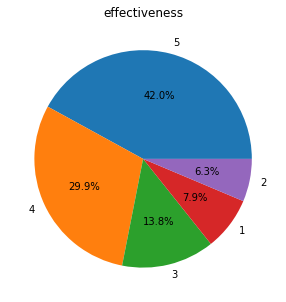

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x=dfall_pruned.effectiveness.value_counts(), 
       labels=dfall_pruned.effectiveness.value_counts().index,
       autopct='%1.1f%%')
ax.set_title('effectiveness')

Text(0.5, 1.0, 'sideEffects')

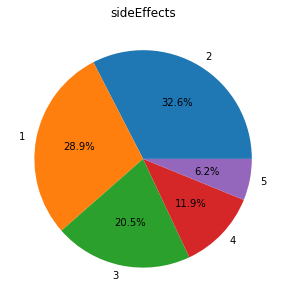

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x=dfall_pruned.sideEffects.value_counts(), 
       labels=dfall_pruned.sideEffects.value_counts().index,
       autopct='%1.1f%%')
ax.set_title('sideEffects')

In [ ]:
#Preparing to split data

# independent variables (All other factors)
X = dfall_pruned.drop(['rating'], axis=1)
# dependent/target variable (Positive (1) or Negative (-1) opinion)
#y = dfall_pruned.rating
y = dfall_pruned['rating'].to_numpy()
y = y.reshape((y.shape[0], 1))

'\nX_train = X.iloc[:3107,:]\nX_test = X.iloc[3107:,:]\n\ny_train = y.iloc[:3107]\ny_test = y.iloc[3107:]\n'

In [ ]:
X

,effectiveness,sideEffects,benefitsReview,sideEffectsReview,commentsReview
0,5,2,184,197,65
1,5,4,178,258,62
2,5,1,254,42,387
3,2,2,598,111,158
4,2,4,114,150,9
...,...,...,...,...,...
4138,4,4,230,371,218
4139,5,1,306,35,121
4140,4,3,31,47,262
4141,5,1,162,169,306


In [ ]:
y

array([[-1],
       [-1],
       [ 1],
       ...,
       [ 1],
       [ 1],
       [ 1]])

In [ ]:
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Use normalizer on each X data
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [ ]:
X_train

array([[0.00840336, 0.00560224, 0.80952381, 0.05322129, 1.        ],
       [0.01602564, 0.00641026, 0.17307692, 0.01282051, 1.        ],
       [0.00796813, 0.00398406, 1.        , 0.39840637, 0.5059761 ],
       ...,
       [0.01144165, 0.00457666, 1.        , 0.71167048, 0.60411899],
       [0.01550388, 0.01550388, 0.5503876 , 0.96511628, 1.        ],
       [0.0059952 , 0.0059952 , 0.15347722, 0.51318945, 1.        ]])

In [ ]:
X_test

array([[0.00114679, 0.00229358, 0.12614679, 1.        , 0.25860092],
       [0.01754386, 0.00350877, 1.        , 0.92982456, 0.99298246],
       [0.0152439 , 0.00609756, 0.39634146, 0.13719512, 1.        ],
       ...,
       [0.01273885, 0.00636943, 1.        , 0.61783439, 0.39490446],
       [0.00834725, 0.00166945, 0.87479132, 0.05175292, 1.        ],
       [0.02898551, 0.00724638, 1.        , 0.6884058 , 0.51449275]])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3314, 5)
(829, 5)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(3314, 1)
(829, 1)


In [ ]:
len(X_train)

3314

#Task 3

In [ ]:
#Logistic Regression Functions
def sigmoid(z):
  return 1/(1+ np.exp(-1*z))
sigmoid_vector = np.vectorize(sigmoid)
def calc_A(w,X,b):
  return sigmoid_vector(np.dot(w.T,X) + b)
def calc_cost(m,Y,A):
  return -1/m * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))
def calc_dw(X,A,Y,n):
  return np.dot(X, (A-Y).T)/n
def calc_db(A,Y,n):
  return np.sum(A-Y)/n

In [ ]:
#use a seeded generator so that we can replicate results if needed
randomgen = np.random.RandomState(seed=52313)

#initialize weights
init_w = randomgen.random((5,1)) 
print(init_w)
print(init_w.shape)
print(init_w.T)
print(init_w.T.shape)

#initialize coefficient
init_b = randomgen.random() 
print(init_b)

[[0.4063786 ]
 [0.0708369 ]
 [0.62235815]
 [0.00425435]
 [0.0704553 ]]
(5, 1)
[[0.4063786  0.0708369  0.62235815 0.00425435 0.0704553 ]]
(1, 5)
0.15659407112740387


In [ ]:
LEARNING_RATE=0.1

#batch gradient decsent:
def batch_gd(epochs, learning_rate = LEARNING_RATE, my_X = X_train.T, my_Y = y_train.T, w_start=init_w, b_start=init_b):
  w = w_start
  b = b_start
  for i in range ( epochs ):
      ####Evaluation####
      n = X_train.shape[0]
      m = y.shape[0]
      
      A=calc_A(w,my_X,b)
      cost = calc_cost(m,my_Y,A)
      dw = calc_dw(my_X,A,my_Y,n)
      db = calc_db(A,my_Y,n)

      ###Update###
      w = w - learning_rate*dw
      b = b - learning_rate*db
  return (w,b)

In [ ]:
#Stochastic gradient descent:
"""
for i in range ( nb_epochs ):
  np.random.shuffle ( data )
  for example in data :
    params_grad = eval uate_gra dient ( loss_function , example , params )
    params = params - learning_rate * params_grad
"""

#X_train_shuffle = X_train
def stochastic_gd(epochs, learning_rate = LEARNING_RATE, my_X = X_train, my_Y = y_train, w_start=init_w, b_start=init_b):
  w = w_start
  b = b_start
  for i in range ( epochs ):
    randomize = np.arange(len(my_X))
    np.random.shuffle(randomize)
    my_X = my_X[randomize]
    my_Y = my_Y[randomize]

    for j in range(len(my_X)):
      # need to select a x and a  y post-shuffle
      my_example_X = my_X[j].T 
      my_example_Y = my_Y[j].T 
      my_example_X=my_example_X.reshape((my_example_X.shape[0], 1))
      my_example_Y=my_example_Y.reshape((my_example_Y.shape[0], 1))

      ####Evaluation####
      n = my_example_X.shape[0]
      m = my_example_Y.shape[0]

      A=calc_A(w,my_example_X,b)
      cost = calc_cost(m,my_example_Y,A)
      dw = calc_dw(my_example_X,A,my_example_Y,n)
      db = calc_db(A,my_example_Y,n)
      ###Update###
      w = w - learning_rate*dw
      b = b - learning_rate*db
  return (w,b)

In [ ]:
print(X_train[0:5])
print(X_train.T[0])

[[0.00840336 0.00560224 0.80952381 0.05322129 1.        ]
 [0.01602564 0.00641026 0.17307692 0.01282051 1.        ]
 [0.00796813 0.00398406 1.         0.39840637 0.5059761 ]
 [0.03311258 0.00662252 1.         0.03311258 0.71523179]
 [0.01730104 0.00692042 0.10380623 0.0899654  1.        ]]
[0.00840336 0.01602564 0.00796813 ... 0.01144165 0.01550388 0.0059952 ]


We demonstrate a single 'set' of 50 epochs training for BGD and SGD.

In [ ]:
#generate the corresponding weights and offset 
#for our logistic regression curve - batch_gd verison
start = time.time()
batch_res = batch_gd(50)
end = time.time()
print("Time elapsed for batch: " + str(end - start))
batch_w = batch_res[0]
batch_b = batch_res[1]

Time elapsed for batch: 0.2139911651611328


In [ ]:
print(batch_w)
print(batch_b)

[[ 0.41614169]
 [ 0.05806669]
 [ 0.78286215]
 [-0.44780868]
 [-0.15825452]]
-0.23114848858408388


In [ ]:
#generate the corresponding weights and offset 
#for our logistic regression curve - stochastic_gd version
start = time.time()
sto_res = stochastic_gd(50)
end = time.time()
print("Time elapsed for sto: " + str(end - start))
sto_w = sto_res[0]
sto_b = sto_res[1]

Time elapsed for sto: 12.135244369506836


In [ ]:
print(sto_w)
print(sto_b)

[[ 7.12314862]
 [-5.91648693]
 [ 8.4365184 ]
 [-4.44960325]
 [ 4.99717923]]
-7.727239780752344


In [ ]:
# compute predicted y's
# Ultimately, we're just looking to see if a predicted opinion is POSITIVE or NEGATIVE.
#so we only care for the signs
y_batch_train = X_train @ batch_w + batch_b
y_sto_train = X_train @ sto_w + sto_b
y_batch_train = np.sign(y_batch_train)
y_sto_train = np.sign(y_sto_train)
print("Batch Train accuracy: " + str(np.sum(y_batch_train == y_train)/y_batch_train.shape[0]))
print("Sto Train accuracy: " + str(np.sum(y_sto_train == y_train)/y_sto_train.shape[0]))


#Our model has only been trained on a relatively small dataset
#for a short amount of time
#so it's reasonable to expect that accuracy is not far about 50%.

Batch Train accuracy: 0.5612552806276403
Sto Train accuracy: 0.5781532890766445


In [ ]:
#Get the predicted ys and accuracy

print(X_test.shape)
print(y_test.shape)

print(sto_w.shape)
print(sto_b.shape)

#X_test[0]
#(np.matmul(X_test[0],sto_w)) + sto_b

(829, 5)
(829, 1)
(5, 1)
()


In [ ]:
# compute predicted y's
y_batch = X_test @ batch_w + batch_b
y_sha =  X_test @ sto_w + sto_b
# Ultimately, we're just looking to see 
#if a predicted opinion is POSITIVE or NEGATIVE.
#so we only care for the signs
y_batch = np.sign(y_batch)
y_sha = np.sign(y_sha)

In [ ]:
print(y_batch[0:10])

[[-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]]


In [ ]:
#repeat 4 more time to see if there are improvements
for i in range (1, 5):
  print("Round " + str((i*50)+50))
  #generate the corresponding weights and offset 
  #for our logistic regression curve - batch_gd verison
  start = time.time()
  batch_res = batch_gd(50, w_start=batch_w, b_start=batch_b)
  end = time.time()
  print("Time elapsed for batch: " + str(end - start))
  batch_w = batch_res[0]
  batch_b = batch_res[1]
  #generate the corresponding weights and offset 
  #for our logistic regression curve - stochastic_gd version
  start = time.time()
  sto_res = stochastic_gd(50, w_start=sto_w, b_start=sto_b)
  end = time.time()
  print("Time elapsed for sto: " + str(end - start))
  sto_w = sto_res[0]
  sto_b = sto_res[1]
  y_batch_train = X_train @ batch_w + batch_b
  y_sto_train = X_train @ sto_w + sto_b
  y_batch_train = np.sign(y_batch_train)
  y_sto_train = np.sign(y_sto_train)
  print("Batch Train accuracy: " + str(np.sum(y_batch_train == y_train)/y_batch_train.shape[0]))
  print("Sto Train accuracy: " + str(np.sum(y_sto_train == y_train)/y_sto_train.shape[0]))

#more epochs trained = generally better accuracy

Round 100
Time elapsed for batch: 0.19092130661010742
Time elapsed for sto: 12.124550819396973
Batch Train accuracy: 0.5564272782136391
Sto Train accuracy: 0.5929390464695232
Round 150
Time elapsed for batch: 0.1574268341064453
Time elapsed for sto: 11.696076393127441
Batch Train accuracy: 0.5642727821363911
Sto Train accuracy: 0.6258298129149065
Round 200
Time elapsed for batch: 0.15480732917785645
Time elapsed for sto: 12.053049564361572
Batch Train accuracy: 0.5687990343995172
Sto Train accuracy: 0.6333735666867834
Round 250
Time elapsed for batch: 0.15139985084533691
Time elapsed for sto: 11.375460863113403
Batch Train accuracy: 0.5757392878696439
Sto Train accuracy: 0.6004828002414001


In [ ]:
print("w,b for batch")
print(batch_w,batch_b)
print("w,b for sto")
print(sto_w,sto_b)

print("Batch Test accuracy: " + str(np.sum(y_batch == y_test)/y_batch.shape[0]))
print("Sto Test accuracy: " + str(np.sum(y_sha == y_test)/y_sha.shape[0]))


w,b for batch
[[ 0.47195729]
 [ 0.02011831]
 [ 1.77869321]
 [-1.26296906]
 [-0.0876019 ]] -0.542435464529532
w,b for sto
[[ 29.95586562]
 [-30.28905047]
 [  8.53640229]
 [ -4.3864141 ]
 [  5.08341025]] -7.821145568892518
Batch Test accuracy: 0.5211097708082026
Sto Test accuracy: 0.5452352231604343


#Task 4

##Optimization 1 - Momentum 

In [ ]:
#now, we keep the last step update's data
#and add a fraction of it to the current update
MOMENTUM_FACTOR = 0.9
#X_train_shuffle = X_train
def stochastic_momentum_gd(epochs, prev_w, prev_b, learning_rate = LEARNING_RATE, 
                           my_X = X_train, my_Y = y_train, w_start=init_w, 
                           b_start=init_b, mom_factor = MOMENTUM_FACTOR):
  w = w_start
  b = b_start
  previous_w = prev_w
  previous_b = prev_b
  for i in range ( epochs ):
    randomize = np.arange(len(my_X))
    np.random.shuffle(randomize)
    my_X = my_X[randomize]
    my_Y = my_Y[randomize]

    #stochiastic step the same as before
    for j in range(len(my_X)):
      #X and Y:
      my_example_X = my_X[j].T 
      my_example_Y = my_Y[j].T 
      my_example_X=my_example_X.reshape((my_example_X.shape[0], 1))
      my_example_Y=my_example_Y.reshape((my_example_Y.shape[0], 1))


      ####Evaluation####
      n = my_example_X.shape[0]
      m = my_example_Y.shape[0]

      A=calc_A(w,my_example_X,b)
      cost = calc_cost(m,my_example_Y,A)
      dw = calc_dw(my_example_X,A,my_example_Y,n)
      db = calc_db(A,my_example_Y,n)

      ###Update###
      w = w - (learning_rate*dw) - (previous_w * MOMENTUM_FACTOR)
      b = b - (learning_rate*db) - (previous_b * MOMENTUM_FACTOR)

      #record the step's w and b for momentum use for next step
      previous_w=w
      previous_b=b

  #We also return previous factors so that they 
  #can be saved for further momentum training
  return [w,b,previous_w,previous_b]

In [ ]:
stomom_w = init_w
stomom_b = init_b
prev_stomom_w = np.zeros((5,1))
prev_stomom_b = 0

#repeat 5 time
for i in range (1, 6):
  print("Epoch " + str((i*50)))
  start = time.time()
  stomom_res = stochastic_momentum_gd(50, prev_w=prev_stomom_w, prev_b=prev_stomom_b,
                                      w_start=stomom_w, b_start=stomom_b
                                      )
  end = time.time()
  print("Time elapsed for sto-momentum: " + str(end - start))
  stomom_w = stomom_res[0]
  stomom_b = stomom_res[1]
  prev_stomom_w = stomom_res[2]
  prev_stomom_b = stomom_res[3]
  y_stomom_train = X_train @ stomom_w + stomom_b
  y_stomom_train = np.sign(y_stomom_train)
  print("Sto-Momentum Train accuracy: " 
        + str(np.sum(y_stomom_train == y_train)/y_stomom_train.shape[0]))

Epoch 50
Time elapsed for sto-momentum: 13.887964248657227
Sto-Momentum Train accuracy: 0.7260108630054315
Epoch 100
Time elapsed for sto-momentum: 14.96241307258606
Sto-Momentum Train accuracy: 0.7260108630054315
Epoch 150
Time elapsed for sto-momentum: 14.771312713623047
Sto-Momentum Train accuracy: 0.2739891369945685
Epoch 200
Time elapsed for sto-momentum: 13.856951236724854
Sto-Momentum Train accuracy: 0.7260108630054315
Epoch 250
Time elapsed for sto-momentum: 14.521530866622925
Sto-Momentum Train accuracy: 0.7260108630054315


In [ ]:
print("w,b for stomom")
print(stomom_w,stomom_b)

y_stomom_test = X_test @ stomom_w + stomom_b
y_stomom_test = np.sign(y_stomom_test)
print("Stomom Test accuracy: " + 
      str(np.sum(y_stomom_test == y_test)/y_stomom_test.shape[0]))



w,b for stomom
[[3.86191436e-05]
 [6.64180118e-06]
 [1.01177746e-03]
 [8.64617148e-04]
 [5.40220772e-04]] 0.000713338774426238
Stomom Test accuracy: 0.7346200241254524


##Thoughts on Momentum Optimization

The resulting accuracy seems sound but recall that the data is imbalanced in two aspects: there are a lot more positive responses than negative ones, and review length in the data is generallly skewed in favor of shorter responses. The prediction accuracy in training data in general was extremely similar to the distribution of positive/negative answers in the original dataset:

 1    0.727734

-1    0.272266

It is likely the momentum optimization caused the SGD to move "too fast" in favor of a large amount of positive (and in once instance, negative) answers and overfit its weights to the training data. It could be argued that given the high accuracy in the test set (73% with Momentum SGD vs 54% with SGD and 52% with Batch) that this may not be a bad thing if all drug data follows the same trends but we can't guarantee that this will be the case in future drug trials. In other words, we should probably avoid using "regular" momentum for this problem, especially if the data we have to work with is so unbalanced.


We can speculate a little bit on the contributing factors to the problem of the data being greatly imbalanced towards positive answers - many of the drugs used in this dataset were prescription drugs like Lexapro and Zoloft that have been prescribed to millions of people every year - it's generally unlikely that a drug used in this context would be ineffective.  

##Optimization 2 - Nesterov accelerated gradient

Now would be a good time to determine if a more controlled version of momentum would avoid quickly overfitting to the data. We will now try and implement Nesterov accelerated gradient, where we first subtract the momentum term from the parameter terms (weight, coefficient) in the evaluation step. This lets us try to "look ahead" and avoid large jumps in the gradient, which hopefully will let us get a better fit in the data without overfitting due to large numbers of positive answers [1]. 

In [ ]:
def stochastic_nesterov_gd(epochs, prev_w, prev_b, learning_rate = LEARNING_RATE, 
                           my_X = X_train, my_Y = y_train, w_start=init_w, 
                           b_start=init_b, mom_factor = MOMENTUM_FACTOR):
  w = w_start
  b = b_start
  previous_w = prev_w
  previous_b = prev_b
  for i in range ( epochs ):
    randomize = np.arange(len(my_X))
    np.random.shuffle(randomize)
    my_X = my_X[randomize]
    my_Y = my_Y[randomize]

    #stochiastic step the same as before
    for j in range(len(my_X)):
      #X and Y
      my_example_X = my_X[j].T 
      my_example_Y = my_Y[j].T 
      my_example_X=my_example_X.reshape((my_example_X.shape[0], 1))
      my_example_Y=my_example_Y.reshape((my_example_Y.shape[0], 1))

      ####Evaluation####
      n = my_example_X.shape[0]
      m = my_example_Y.shape[0]
      #Nesterov accelerated "look-ahead" modification
      w = w - (previous_w * MOMENTUM_FACTOR)
      b = b - (previous_b * MOMENTUM_FACTOR)

      A=calc_A(w,my_example_X,b)
      cost = calc_cost(m,my_example_Y,A)
      dw = calc_dw(my_example_X,A,my_example_Y,n)
      db = calc_db(A,my_example_Y,n)
      ###Update###
      w = w - (learning_rate*dw) - (previous_w * MOMENTUM_FACTOR)
      b = b - (learning_rate*db) - (previous_b * MOMENTUM_FACTOR)
      #record the step's w and b for momentum use for next step
      previous_w=w
      previous_b=b
  #return previous factors so that they 
  #can be saved for further momentum training
  return [w,b,previous_w,previous_b]

In [ ]:
#Appears to behave mostly similar to its gradient counterpart.

stonester_w = init_w
stonester_b = init_b
prev_stonester_w = np.zeros((5,1))
prev_stonester_b = 0

#repeat 5 time
for i in range (1, 6):
  print("Epoch " + str((i*50)))
  start = time.time()
  stonester_res = stochastic_nesterov_gd(50, prev_w=prev_stonester_w, prev_b=prev_stonester_b,
                                      w_start=stonester_w, b_start=stonester_b
                                      )
  end = time.time()
  print("Time elapsed for sto-nesterov: " + str(end - start))
  stonester_w = stonester_res[0]
  stonester_b = stonester_res[1]
  prev_stonester_w = stonester_res[2]
  prev_stonester_b = stonester_res[3]
  y_stonester_train = X_train @ stonester_w + stonester_b
  y_stonester_train = np.sign(y_stonester_train)
  print("Sto-Nesterov Train accuracy: " 
        + str(np.sum(y_stonester_train == y_train)/y_stonester_train.shape[0]))

Epoch 50
Time elapsed for sto-nesterov: 14.3397696018219
Sto-Nesterov Train accuracy: 0.37356668678334337
Epoch 100
Time elapsed for sto-nesterov: 14.054285764694214
Sto-Nesterov Train accuracy: 0.7260108630054315
Epoch 150
Time elapsed for sto-nesterov: 13.633586883544922
Sto-Nesterov Train accuracy: 0.6388050694025347
Epoch 200
Time elapsed for sto-nesterov: 14.40108871459961
Sto-Nesterov Train accuracy: 0.7410983705491853
Epoch 250
Time elapsed for sto-nesterov: 14.742513179779053
Sto-Nesterov Train accuracy: 0.7260108630054315


In [ ]:
print("w,b for stonester")
print(stonester_w,stonester_b)

y_stonester_test = X_test @ stonester_w + stonester_b
y_stonester_test = np.sign(y_stonester_test)
print("Stonester Test accuracy: " + 
      str(np.sum(y_stonester_test == y_test)/y_stonester_test.shape[0]))

w,b for stonester
[[0.00040127]
 [0.00025183]
 [0.00988823]
 [0.00230443]
 [0.01181438]] 0.007232898478675594
Stonester Test accuracy: 0.7346200241254524


##Thoughts on Nesterov Optimization 

Using the Nesterov optimization to control the momentum's impact on SGD was successful - the accuracy rate of the ouput weights is no longer  identical to the positive/negative distribution during in training, and varies in a manner that suggests a more plausible set of weights and coefficient is being developed. We can confidently recommend Nesterov Optimization as a result because the controlled momentum is able to find a w/b that is a more accurate combination without quickly overfitting to the training set even when an imbalance is present.

##Closing Thought on Comment Length

It is worth noting that roughly 90% of the comments were all of "brief" (0-500 character) length.  We can speculate that comments will generally be brief due to the nature of people wanting to quickly complete an online review, and some review websites may even have character limits to prevent reviews from becoming overly verbose. In other words, this trend would likely be present in similar datasets as well. 

While we can have a model try to account for the remaining 10% of verbose comments as was done here, a future study would likely be able to get more meaning from comment lengths by dividing the reviews into buckets of 100s (0-100, 101-200, etc... with any reviews of length above 500 characters going into a dedicated 500+ bucket).

#References

[1] Ruder, Sebastian. "An overview of gradient descent optimization algorithms." arXiv preprint arXiv:1609.04747 (2016).